# Simulation du jeux de LIDO simplifié

# Iskander ben salah 2LM3


## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [60]:
import numpy as np

### Simulation du lancé de dé

In [61]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [62]:
Roll()

4

### Compléter le code et commenter

In [63]:
A=0
NA=0
S=10
c=0
temp =Roll()
NA+=1
while (temp!=6) :
    temp=Roll()
    NA+=1
    #print(NA,temp)
#print ("sorties apres {} coups".format(NA))
## parcours vers la cible
while A!=S:
    temp=Roll()
    if temp+A < S:
        A+=temp
        NA+=1
        print(NA,temp,A)
    elif temp+A > S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)
        
    
    

2 4 4
3 3 7
4 3 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [64]:
def sim(S):
    A=0
    NA=0
    c=0
    temp =Roll()
    NA+=1
    while (temp!=6) :
        temp=Roll()
        NA+=1
        #print(NA,temp)
    #print ("sorties apres {} coups".format(NA))
## parcours vers la cible
    while A!=S:
        temp=Roll()
        NA+=1
        if temp+A < S:
            A+=temp
            #NA+=1
        
        elif temp+A > S:
            continue
            #NA+=1
        
        else:
            A=S
            #NA+=1
    return NA #nombre de coup necessaire pour atteindre la cible
        
        

In [65]:
# simulation 10000 fois
L=[sim (30) for i in range(10000)]
Moy=sum(L)/10000
print(Moy)


19.4315


In [66]:
x=list(range(10,20))
y=[sum([sim(u) for i in range (10000)])/10000 for u in x]
print(y)

[13.5336, 13.7684, 14.1989, 14.5742, 14.8937, 15.1546, 15.353, 15.5671, 15.9159, 16.1677]


In [67]:
import matplotlib.pyplot as plt

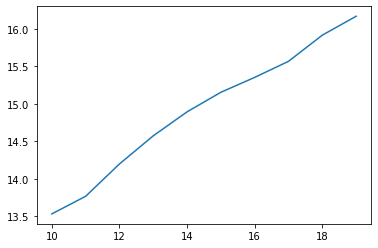

In [68]:
plt.plot(x,y)

In [69]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [70]:
slope


0.29198606060606064

In [ ]:
intercept

### Simulation de $10^5$  scénario 

Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [ ]:
ESP=Freq.sum()/10**5

In [ ]:
x=list(range(10,20))

In [ ]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x,y
        )

In [ ]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [71]:
slope

0.29198606060606064

In [52]:
intercept


10.61856909090909

In [53]:
yy=[slope*u+intercept for u in x]



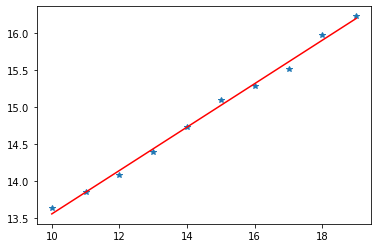

In [54]:
plt.show(plt.plot(x,y,'*',x,yy,'r-'))

## conclusion 1
- Simulation de jeux lido avec un seul joueur
    S= longeur de chemin
    A= position du joueur
    NA=nombre du coups effectués
    le joueur reste sur sa potsition initiale jusqua la valeur de déé=6 puis il avance au position 1 et tant que sa position   est inférieure au nombre de pas nécessaires s il relance le dé et incrémente le nombre de coup effectués
    si le valeur de déé + A > S le joueur n'avance pas mais le nombre de coup effectues va incrementer

 - la simulation nous permet d'avoir l'éspérance du sceanrio 10^5 et la nuage des points de la moyenne dans l'intervalle [10.20]
 - apres faire une simulation on a degager une formule mathematique sous la forme de ax+b